# Import libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [9]:
# Import Data 
path = r'C:\Users\beaac\Desktop\Chocolate Bars'

df_bars = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Flavors_Of_Cacao_cleaned.csv'))

In [11]:
df_bars.head()

,Unnamed: 0,Company (Maker-if known),Bar_Name,REF,Review_Date,Cocoa_Percent,Location,Rating,Bean_Type,Bean_Origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru


In [13]:
df_bars.shape

(1795, 10)

# Data Preprocessing

In [16]:
df_bars.columns

Index(['Unnamed: 0', 'Company  (Maker-if known)', 'Bar_Name', 'REF',
       'Review_Date', 'Cocoa_Percent', 'Location', 'Rating', 'Bean_Type',
       'Bean_Origin'],
      dtype='object')

In [20]:
df_bars = df_bars.drop(columns=['Unnamed: 0', 'REF', 'Bar_Name'])


In [24]:
df_bars = df_bars.rename(columns={
    'Company  (Maker-if known)': 'Company',
    'Review_Date': 'ReviewDate',
    'Cocoa_Percent': 'CocoaPercent',
    'Bean_Origin': 'BroadOrigin'
})


In [26]:
df_bars.dtypes

Company  (Maker-if known)     object
ReviewDate                     int64
CocoaPercent                 float64
Location                      object
Rating                       float64
Bean_Type                     object
BroadOrigin                   object
dtype: object

In [28]:
# Count missing entries in each column
df_bars.isnull().sum()


Company  (Maker-if known)    0
ReviewDate                   0
CocoaPercent                 0
Location                     0
Rating                       0
Bean_Type                    1
BroadOrigin                  1
dtype: int64

In [46]:
df_bars['Bean_Type'] = df_bars['Bean_Type'].fillna('Unknown')
df_bars['BroadOrigin'] = df_bars['BroadOrigin'].fillna('Unknown')


In [52]:
df_bars.shape

(1795, 7)

# Standardization

In [58]:
# Choose the columns you want to scale
numeric_cols = ['CocoaPercent', 'Rating']
features = df_bars[numeric_cols]

In [60]:
# Create the scaler and fit-transform the data
scaler = StandardScaler()
scaled_values = scaler.fit_transform(features)

In [62]:
scaled_values

array([[-1.37602243,  1.18023096],
       [-0.26866522, -0.91212912],
       [-0.26866522, -0.3890391 ],
       ...,
       [-1.05963465,  0.65714094],
       [-1.53421631,  0.13405092],
       [-1.05963465, -0.3890391 ]])

# Elbow Technique

In [75]:
 #Define the range of cluster counts to test
num_cl = range(1, 10)
inertia = []

# Fit KMeans for each cluster count and store the inertia
for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit( scaled_values)
    inertia.append(kmeans.inertia_)

C:\Users\beaac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\beaac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\beaac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\beaac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

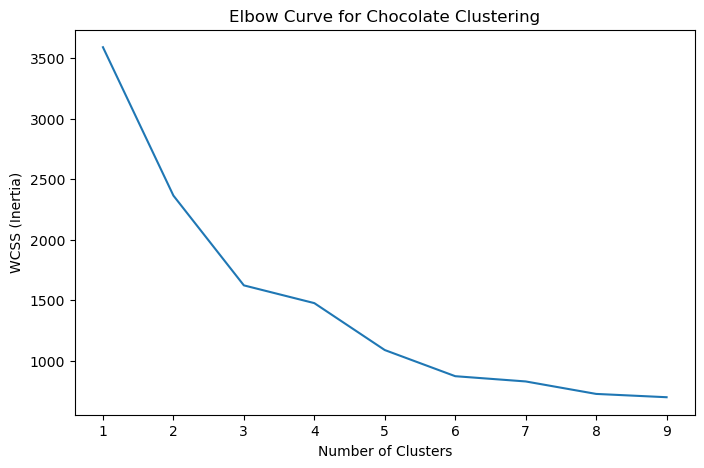

In [77]:
plt.figure(figsize=(8, 5))
plt.plot(num_cl, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Curve for Chocolate Clustering')
plt.show()

The biggest drop in WCSS occurs between 1 and 3 clusters, and after that the curve flattens out. That elbow around k = 3 it’s likely the best choice for clustering.

Choosing k = 3 balances simplicity, avoiding over segmentation while capturing the key structure of the data.

# k-means algorithm

In [105]:
# Create the k-means object.

kmeans= KMeans(n_clusters = 3)

In [107]:
# Fit the k-means objet to the dtaframe

labels = kmeans.fit_predict(scaled_values)


C:\Users\beaac\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [109]:
df_bars['Cluster'] = labels


In [111]:
df_bars.head()

,Company (Maker-if known),ReviewDate,CocoaPercent,Location,Rating,Bean_Type,BroadOrigin,clusters,Cluster
0,A. Morin,2016,63.0,France,3.75,Unknown,Sao Tome,KMeans(n_clusters=3),0
1,A. Morin,2015,70.0,France,2.75,Unknown,Togo,KMeans(n_clusters=3),1
2,A. Morin,2015,70.0,France,3.00,Unknown,Togo,KMeans(n_clusters=3),1
3,A. Morin,2015,70.0,France,3.50,Unknown,Togo,KMeans(n_clusters=3),0
4,A. Morin,2015,70.0,France,3.50,Unknown,Peru,KMeans(n_clusters=3),0


In [115]:
df_bars.drop(columns=['clusters'], inplace=True)


In [117]:
df_bars['Cluster'].value_counts()

Cluster
0    954
1    668
2    173
Name: count, dtype: int64

# Vsisualizations

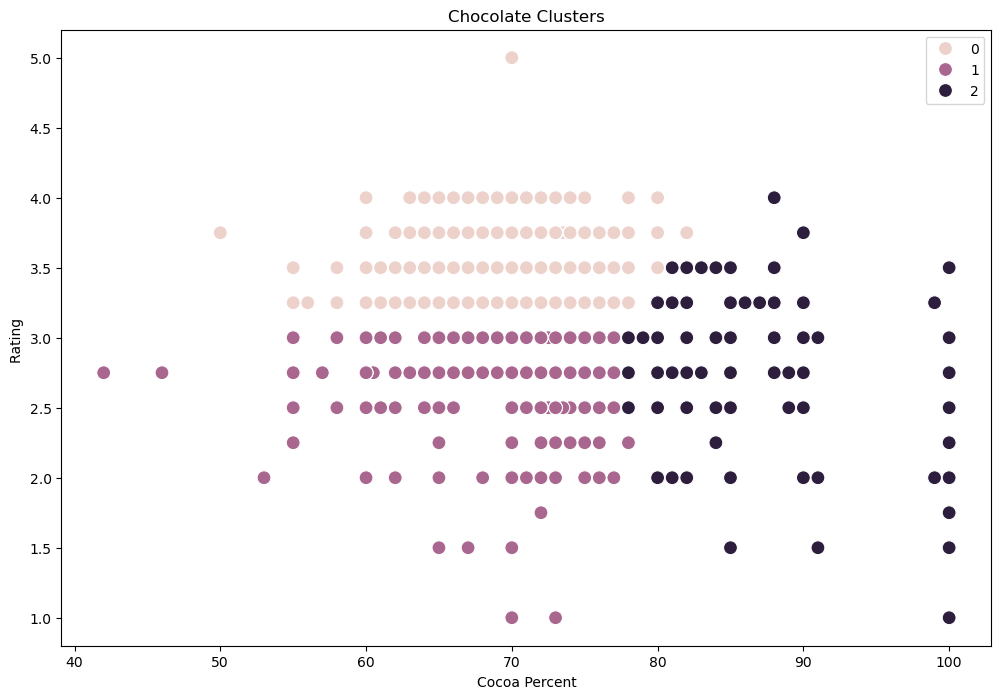

In [122]:

plt.figure(figsize=(12, 8))

# Create the scatterplot
ax = sns.scatterplot(
    x=df_bars['CocoaPercent'],  # CocoaPercent (scaled)
    y=df_bars['Rating'],  # Rating (scaled)
    hue=kmeans.labels_,     # Cluster labels
    s=100
)

ax.grid(False)  # Remove background grid
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating ')
plt.title('Chocolate Clusters')
plt.show()


# Descriptive statistics and insights

In [125]:
# Calculate descriptive statistics for each cluster

df_bars.loc[df_bars['Cluster'] == 2, 'ClusterColor'] = 'dark purple'
df_bars.loc[df_bars['Cluster'] == 1, 'ClusterColor'] = 'purple'
df_bars.loc[df_bars['Cluster'] == 0, 'ClusterColor'] = 'pink'


In [127]:
df_bars.groupby('Cluster').agg({
    'CocoaPercent': ['mean', 'median'],
    'Rating': ['mean', 'median']
})


CocoaPercent           Rating       
                mean median      mean median
Cluster                                     
0          70.431342   70.0  3.537474   3.50
1          70.037425   70.0  2.771332   2.75
2          85.098266   83.0  2.848266   3.00

## Pink 

- Cocoa Percent: Moderate cocoa content, they are neither too sweet nor top bitter.
- Rating:  The average rating is 3.54
- Insight: The pink cluster includes chocolate bars with moderate cocoa percentages and the highest average ating among all clusters. These bars strike a desirable balance between sweetness and richness, making them the most consistently enjoyable for reviewers.

## Purple
-  Cocoa Percent: Almost identical to cluster 0, sitting around 70%, strong flavor without being overpowering
-  Rating: Te average rating is 2.77
-  Insight: These chocolates may have similar intensity, but something else, like bitteness, textur, or bean origen is turning reviewers off.
-  This Cluster may contain chocolates taht are too standard or forgetable, not standing ou despite having a favorable cocoa range.
  

## Dark purple
- Cocoa Percent: With an average of over 85%, these are likely ultra dark chocolates.
- Rating: Median rating is 3.0 indicating a split, some reviewers might appreciate the boldness, but others are clearly turned off.
- Insights: Cluster 2 represents chocolates with exceptionally high cooa percentages, but lower review scores. These bars may appeal to a specific audience who like bold flavors or better nutritional appeal. suggesting that intensity alone doesent guarantee satisfaction.

# Propose of the results and future steps

This data set is the foundation for targeted marketing, flavor recommendations , or product development strategies.

- cluster 0: Balanced cocoa and high ratings
- cluster 1: Similar cocoa but lower ratings
- cluster 2: high cocoa and lower ratings 

Future steps:
- Enrich the clusters based on cocoa and rating with other vriables like bean type, bean origin and manufacter.
- uncover patterns like: Are premiun bars all coming from a specific region?
-  Build taste profiles (costumerr behavior)
  

In [137]:
df_bars.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Chocolate_bars_Updated.csv'))